In [13]:
import tensorflow as tf

# 导入fashion mnist数据集的语句
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()

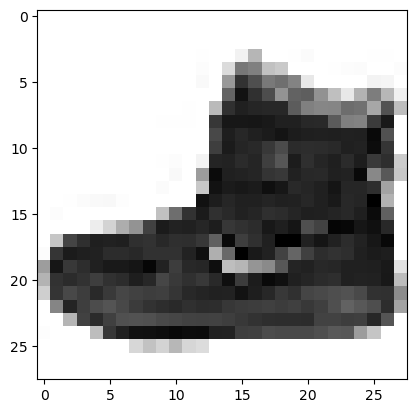

In [15]:
plot_image(train_images[0])

In [16]:
total_num = len(train_images)
valid_split = 0.2                           # 验证集的比勿占20%
train_num = int(total_num*(1-valid_split))  # 训练集的数目
train_X = train_images[:train_num]          # 前部分给训练集
train_y = train_labels[:train_num]
valid_X = train_images[train_num:]          # 后20%给验证集
valid_y = train_labels[train_num:]
test_X = test_images
test_y = test_labels

train_images.shape, valid_X.shape, test_X.shape

((60000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [17]:
# 把（28 28）的结构拉直为一行 784
train_X = train_X.reshape(-1, 784)
valid_X = valid_X.reshape(-1, 784)
test_X = test_X.reshape (-1, 784)

In [18]:
from sklearn.preprocessing import StandardScaler

# 特征数据归一化
train_X = tf.cast(train_X/255.0, tf.float32)
valid_X = tf.cast(valid_X/255.0, tf.float32)
test_X = tf.cast(test_X/255.0, tf.float32)

In [19]:
# 对标签数据进行独热编码
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

In [20]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)


def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)


def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])


def accuracy(x, y, w, b):
    pred = model(x, w, b)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [21]:
# 定义变量
W = tf.Variable(tf.random.normal([784, 10], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]), dtype=tf.float32)

training_epochs = 1000    # 训练轮数
batch_size = 2048         # 单次训练样本数（批次大小）
learning_rate = 0.001   # 学习率

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [22]:
import numpy as np

loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

best_loss_test = np.inf
best_acc_test = np.inf
total_step = int(train_num/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = train_X[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]

        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))

    loss_train = loss(train_X, train_y, W, B).numpy()
    loss_valid = loss(valid_X, valid_y, W, B).numpy()
    acc_train = accuracy(train_X, train_y, W, B).numpy()
    acc_valid = accuracy(valid_X, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    if loss_valid <= np.min(loss_list_valid):
        best_loss_test = loss(test_X, test_y, W, B).numpy()
        best_acc_test = accuracy(test_X, test_y, W, B).numpy()
    print("epoch={:4d}, train_loss={:.4f}, train_acc={:4f}, valid_loss={:.4f}, valid_acc={:.4f}".format(epoch+1, loss_train, acc_train, loss_valid, acc_valid))
print("Best model: test_loss={:4f}, test_acc={:4f}".format(best_loss_test, best_acc_test))

epoch=   1, train_loss=11.3516, train_acc=0.052833, valid_loss=11.4327, valid_acc=0.0542
epoch=   2, train_loss=8.5783, train_acc=0.162896, valid_loss=8.6394, valid_acc=0.1618
epoch=   3, train_loss=6.4544, train_acc=0.247354, valid_loss=6.4586, valid_acc=0.2415
epoch=   4, train_loss=5.3206, train_acc=0.319646, valid_loss=5.2918, valid_acc=0.3212
epoch=   5, train_loss=4.7054, train_acc=0.378833, valid_loss=4.6760, valid_acc=0.3808
epoch=   6, train_loss=4.3226, train_acc=0.420396, valid_loss=4.2961, valid_acc=0.4212
epoch=   7, train_loss=4.0580, train_acc=0.451000, valid_loss=4.0345, valid_acc=0.4543
epoch=   8, train_loss=3.8623, train_acc=0.474125, valid_loss=3.8422, valid_acc=0.4757
epoch=   9, train_loss=3.7110, train_acc=0.493000, valid_loss=3.6932, valid_acc=0.4952
epoch=  10, train_loss=3.5892, train_acc=0.509271, valid_loss=3.5731, valid_acc=0.5103
epoch=  11, train_loss=3.4879, train_acc=0.523000, valid_loss=3.4735, valid_acc=0.5223
epoch=  12, train_loss=3.4014, train_acc=

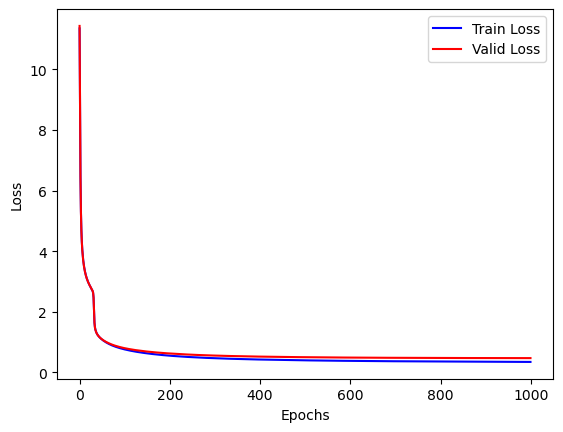

In [23]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train, 'blue', label='Train Loss')
plt.plot(loss_list_valid, 'red', label='Valid Loss')
plt.legend(loc=1)

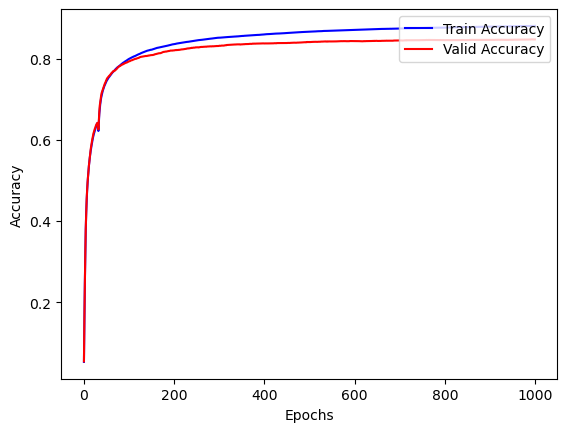

In [24]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train, 'blue', label='Train Accuracy')
plt.plot(acc_list_valid, 'red', label='Valid Accuracy')
plt.legend(loc=1)